In [1]:
from networkit import *
import networkit.generators as gen

import numpy as np
import matplotlib.pyplot as plt

No module named 'seaborn'


In [2]:
G = readGraph("../data/bio/bio-nr-1-size-9.metis", Format.METIS)

In [3]:
generator = gen.BarabasiAlbertGenerator.fit(G)

In [4]:
G2 = generator.generate()

In [5]:
n = G.numberOfNodes()
S = np.array([[G.weight(i, j) for j in range(n)] for i in range(n)])

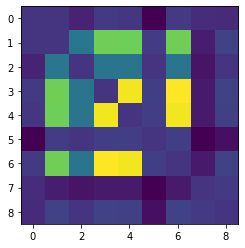

In [6]:
plt.imshow(S)

In [17]:
for (u, v) in G.edges():
    if S[u, v] <= 0:
        G.removeEdge(u, v)

In [18]:
[G.degree(u) for u in G.nodes()]

[4, 7, 6, 7, 7, 5, 7, 1, 6]

In [20]:
import networkx as nx

In [33]:
N = nx.Graph()

N.add_weighted_edges_from((u, v, S[u, v]) for (u, v) in G.edges())

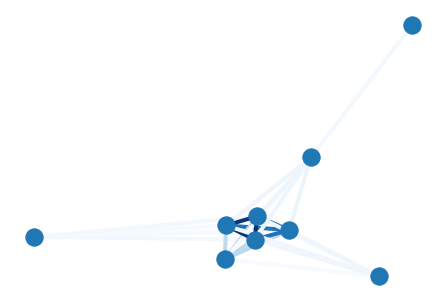

In [43]:
pos = nx.spring_layout(N)
nx.draw(N, pos, width=4, edge_color=[S[u, v] for (u, v) in N.edges()], edge_cmap=plt.cm.Blues)

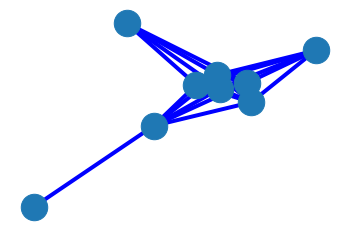

In [71]:
negative_edges = [(u, v) for (u, v) in G.edges() if S[u, v] <= 0]
positive_edges = [(u, v) for (u, v) in G.edges() if S[u, v] > 0]

pos = nx.spring_layout(N)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(N, pos, node_size=700)

# edges
nx.draw_networkx_edges(N, pos, edgelist=negative_edges,
                       width=4)
nx.draw_networkx_edges(N, pos, edgelist=positive_edges,
                       width=4, edge_color='b')


plt.axis('off')
plt.show()

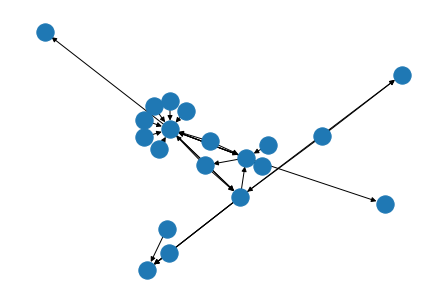

In [58]:
import networkx.generators

nx.draw(nx.scale_free_graph(20))